Name - **D.M.S.S.Dissanayake**   
Index No - **190155L**

# Hough Transforms

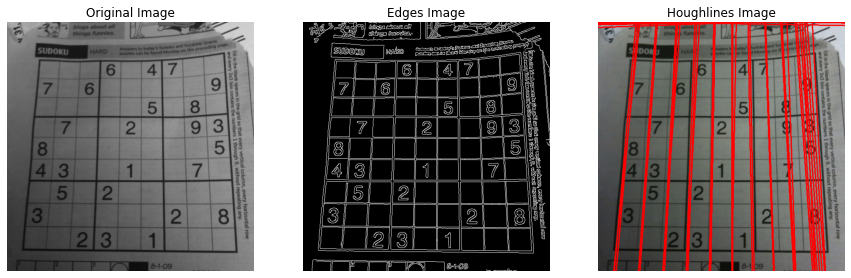

In [9]:
# Question 1
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

im = cv.imread('sudoku.png', cv.IMREAD_COLOR)
assert im is not None
gray = cv.cvtColor( im , cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,20,120,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,175)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 , y0 = a*rho , b*rho
    x1, y1 = int(x0 + 1000*(-b)), int(x0 + 1000*(a))
    x2, y2 = int(x0 - 1000*(-b)), int(x0 - 1000*(a))
    cv.line(im,(x1,y1),(x2,y2),(0,0,255),2)

fig, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))
ax[1].set_title('Edges Image')
ax[2].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[2].set_title('Houghlines Image')
for i in range(3):
    ax[i].axis("off")
plt.show()

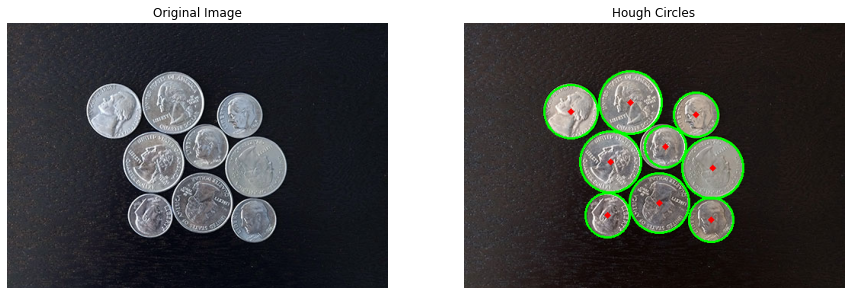

In [30]:
# Question 2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('./coins.jpg', cv.IMREAD_COLOR)
assert im is not None
gray = cv.cvtColor( im , cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT,1,20,param1 = 120,param2 =36, minRadius =20, maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(im,(i[0],i[1]),2,(0,0,255),3)

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].imshow(cv.imread('./coins.jpg'), "gray")
ax[0].set_title('Original Image')
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[1].set_title('Hough Circles')
ax[1].axis("off")

plt.show()


x=29.0,y=109.0,scale=1.0,orientation = 0.0,p1 = (4, 76), p2 = (54, 141)


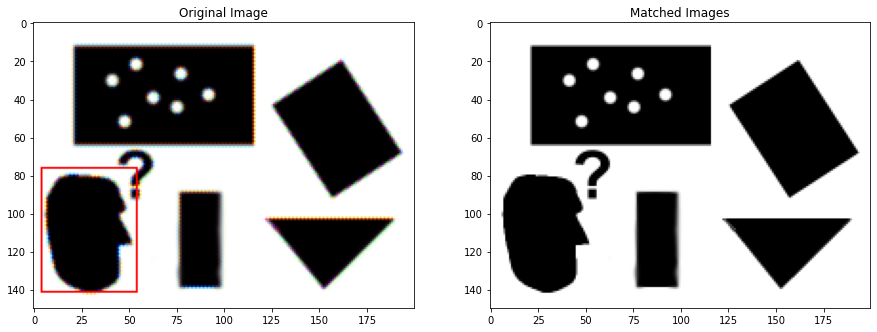

In [33]:
# Question 3

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread(r'pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
temp1 = cv.imread(r'templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

assert im is not None

im_edges = cv.Canny(im, 50, 250)
temp1_edges = cv.Canny(temp1, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp1_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions , votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = temp1.shape[0] / 2. * scale
    halfWidth = temp1.shape[1] / 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x={},y={},scale={},orientation = {},p1 = {}, p2 = {}".format(x,y,scale,orientation,p1,p2) )
    cv.rectangle(out,p1,p2,(0,0,255))
    
fig, ax = plt.subplots(1,2, figsize = (15,15))
ax[0].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[1].set_title('Matched Images')
plt.show()

# Alignment

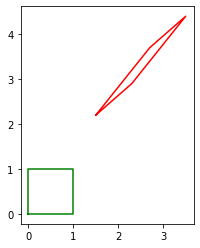

In [34]:
# Question 4
import matplotlib.pyplot as plt

a, b, c, d = [0, 0, 1], [0, 1, 1], [1,1,1], [1,0,1]
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx, ty = 1.5, 2.2
# H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0,0,1]])
# Y = H @ X

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5 # Should be a non-singular matrix here
A = np.array([[a11,a12,tx], [a21, a22, ty], [0,0,1]])
Y = A @ X

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')
ax.set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

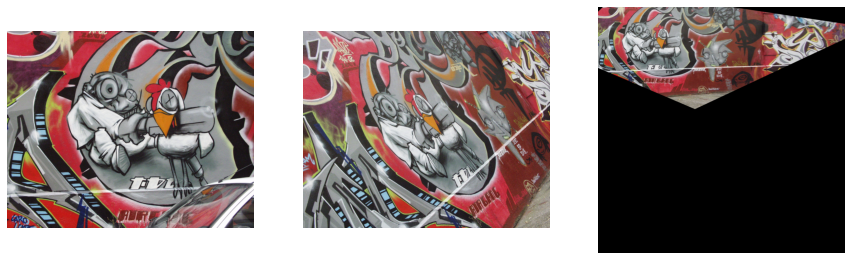

In [45]:
# Question 5
import cv2 as cv
import numpy as np

im1 = cv.imread(r'img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread(r'img4.ppm', cv.IMREAD_ANYCOLOR)

H = []

with open(r'H1to4p') as f:
    H = np.array([[float(h) for h in line.split()] for line in f])

im1to4 = cv.warpPerspective(im4,np.linalg.inv(H),(2000,2000))

fig, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im4, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(im1to4, cv.COLOR_BGR2RGB))
for i in range(3):
    ax[i].axis("off")
plt.show()
